## Clustering National Library Board Infopedia Articles

In this example, we will use clustering to explore the summaries of different articles published by the National Library Board about Singapore.

The hypothesis is that the words used in the text can separate the articles into different "topic" groups.

The use case is automatic topic suggestion for new articles.

Data Source: https://data.gov.sg/dataset/national-library-board-infopedia-articles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# clustering
from sklearn.cluster import KMeans

# visualisation (for sparse matrices)
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_csv('./national-library-board-infopedia-articles.csv')
df

,uid,book_title,subject,summary,original_publisher,digital_publisher,format,language,copyright,author_name,published,resource_url,cover,thumbnail
0,17c74c2c-d8cb-4906-937a-816c6eafa569,Foong Choon Hon,History |Artists |Biographies,"Foong Choon Hon (b. 1928, Perak, Malaysia–d. 3...",na,National Library Board Singapore,text/html :. .,na,All Rights Reserved. National Library Board Si...,admin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
1,afb295d5-0356-447e-af3e-1f2197847e0f,Tan Beng Swee,Biographies |Merchants |Philanthropists,"Tan Beng Swee (b. 1828, Singapore–d. 4 Novembe...",na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,admin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
2,c1dd298c-435a-49da-b5f0-0cd2bb5bc2f0,Lee Man Fong,nlbshtx:Personalities>>Biographies>>Artists |n...,"Lee Man Fong (b. 1913, Guangdong, China–d. 198...",na,National Library Board Singapore,"text/html :. 18.12 KB, 4 p..",na,All Rights Reserved. National Library Board Si...,admin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
3,9c0a34bc-2b4f-47bf-b878-788d1ded1096,Alkaff Mansion,nlbshtx:Architecture and Landscape>>Building T...,Alkaff Mansion is a 19th century colonial bung...,na,National Library Board Singapore,"text/html :. 18.45 KB, 4 p..",eng,All Rights Reserved. National Library Board Si...,admin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
4,22bd0249-22a6-43f1-a8b9-207948cdf8e8,T.H.E Dance Company,nlbshtx:Arts>>Performing Arts>>Dance|Modern da...,"The Human Expression Dance Company, better kno...",na,National Library Board Singapore,"text/html :. 21.53 KB, 4 p..",eng,All Rights Reserved. National Library Board Si...,admin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
5,a14613dd-425d-4462-843b-b6c5df77b8a1,Frederick Nutter Chasen,nlbshtx:Personalities>>Biographies|Zoologists ...,"Frederick Nutter Chasen (b. 1896 Norfolk, Engl...",na,National Library Board Singapore,text/html :. .,na,All Rights Reserved. National Library Board Si...,admin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
6,684bfcfa-333a-4fa5-afcf-40a9597f3cad,Singapore Infopedia,Information resources--Singapore|Reference sou...,Available at all libraries and from home.,na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,admin,2008-09-03,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
7,7115356d-7421-429b-a73d-d9073ed61756,Christmas Island (flora and fauna),nlbshtx:Nature>>Animals|nlbshtx:Nature>>Plants...,The robber crab (Birgus latro) is the largest ...,na,National Library Board Singapore,"text/html :. 7 KB, 2 p..",eng,na,admin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
8,1ea9da03-fff3-4c91-82a9-f4ac7c31d89a,Walter John Napier,nlbshtx:Personalities>>Biographies>>Colonial A...,"Walter John Napier (b. 10 July 1857, Alderly L...",na,National Library Board Singapore,text/html :. 16 KB.,eng,na,admin,2008-03-05,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
9,7c4f9862-8c93-4d99-96c8-bb2eecee4a4a,Woodlands MRT line,nlbshtx:Commerce and Industry>>Tran

In [3]:
# select a column with interesting text
df['summary']

0       Foong Choon Hon (b. 1928, Perak, Malaysia–d. 3...
1       Tan Beng Swee (b. 1828, Singapore–d. 4 Novembe...
2       Lee Man Fong (b. 1913, Guangdong, China–d. 198...
3       Alkaff Mansion is a 19th century colonial bung...
4       The Human Expression Dance Company, better kno...
5       Frederick Nutter Chasen (b. 1896 Norfolk, Engl...
6               Available at all libraries and from home.
7       The robber crab (Birgus latro) is the largest ...
8       Walter John Napier (b. 10 July 1857, Alderly L...
9       The Woodlands Mass Rapid Transit (MRT) line, c...
10      Ustaz Ahmad Sonhadji Mohamad Milatu (b. 18 Aug...
11      The Tamils make up the largest segment of the ...
12      Goh Soo Khim (b. 1944, Singapore–) is a baller...
13      Pulau Merlimau was one of Singapore’s southern...
14      Lee Lim (b. 1931, China–d. 12 January 1989, Si...
15      Beaulieu House is located at 117 Beaulieu Road...
16      Bengkulu, on the coast of West Sumatra, was re...
17      Food c

In [4]:
# convert the text to vectors

vec = TfidfVectorizer()
vec_summary = vec.fit_transform(df['summary'])
vec_summary

<1899x12871 sparse matrix of type '<class 'numpy.float64'>'
	with 98315 stored elements in Compressed Sparse Row format>

In [5]:
# cluster with kmeans. We'll start with a k of 10
# kmeans uses randomized centroid initialization,
# so we set a random state to get stable cluster assignments

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(vec_summary)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [6]:
clusters = kmeans.predict(vec_summary)
clusters

array([8, 1, 8, ..., 8, 8, 1])

In [7]:
# reduce dimensions and plot. Since vectorized text is
# stored in sparse matrices, we use an algorithm that can
# handle sparse matrices without consuming too much memory

svd = TruncatedSVD(n_components=2)
vec_2d = svd.fit_transform(vec_summary)
vec_2d

array([[ 0.21317861, -0.10393726],
       [ 0.25209841, -0.10146514],
       [ 0.14497723, -0.07253104],
       ...,
       [ 0.23937723, -0.12720074],
       [ 0.19563704, -0.08322823],
       [ 0.12930187, -0.03509269]])

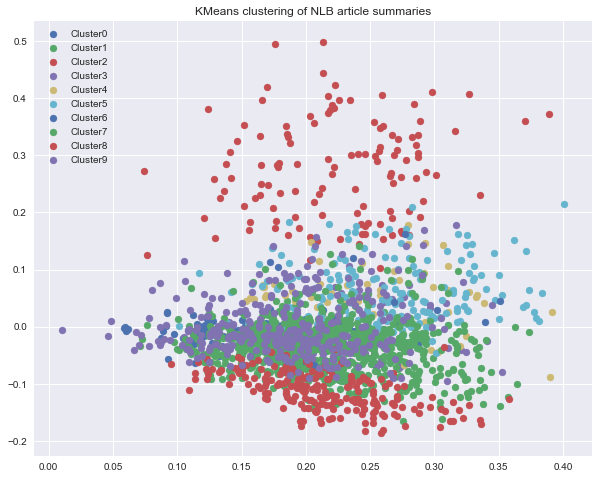

In [8]:
# plot different colours based on clusters

fig, ax = plt.subplots(figsize=(10, 8))
for i in range(k):
    ax.scatter(vec_2d[clusters==i, 0], vec_2d[clusters==i, 1], label=f'Cluster{i}')
    
ax.set_title('KMeans clustering of NLB article summaries')
ax.legend()

In [9]:
# This cluster is mostly Food and Drink
df['summary'][clusters==0]

17      Food courts in Singapore are air-conditioned f...
27      Bubble tea is a beverage originating from Taiw...
32      The sari (or saree) is traditional attire for ...
40      Gasing is a term that refers to both the Malay...
54      Putu piring is a round, steamed rice cake fill...
64      Fish head curry is a spicy, curried dish uniqu...
81      Ponggal or Pongal, also known as Makara Sankra...
101     Watermelon (Citrullus sp.), a tropical fruit, ...
145     Ananas comosus is a fruit whose common name, p...
232     Violet Oon (b. 1949, Malaysia–) is a food crit...
268     The black-naped oriole (Oriolus chinensis) is ...
270     Located in the nasi padang belt of the famous ...
278     Chew Kok Chang 周国灿 (b. 1934, Guangdong, China–...
300     The belimbing (Averrhoa bilimbi), which belong...
303     The Hainanese chicken rice is a dish that cons...
305     Nasi ulam is a traditional Malay dish of rice ...
307     The festival of Eid, known in Singapore as Har...
329     Sampan

In [10]:
# This cluster is mostly biographical
df['summary'][clusters==1]

1       Tan Beng Swee (b. 1828, Singapore–d. 4 Novembe...
5       Frederick Nutter Chasen (b. 1896 Norfolk, Engl...
8       Walter John Napier (b. 10 July 1857, Alderly L...
10      Ustaz Ahmad Sonhadji Mohamad Milatu (b. 18 Aug...
47      Koh Buck Song (b. 1963, Singapore–) is a write...
57      Mohamed Eunos bin Abdullah (b. 1876, Singapore...
61      An Advance Medical Directive (AMD) is a legal ...
62      Tan Sri Tan Chin Tuan (Dr) (b. 21 November 190...
66      Haji Omar Lim Yew Hock (b. 15 October 1914, Si...
71      Seet Ai Mee (Dr) (b. 31 March 1943, Singapore–...
80      Wee Kim Wee (Dr) (b. 4 November 1915, Singapor...
85      Benjamin Henry Sheares (Dr) (b. 12 August 1907...
98      Sir Thomas Stamford Raffles (b. 6 July 1781, o...
100     David Saul Marshall (b. 12 March 1908, Singapo...
102     P. Govindasamy Pillai (b. 1887, Mayavaram, Tam...
131     The Growth Triangle is a concept of mutual coo...
146     Goh Keng Swee (Dr) (b. 6 October 1918, Malacca...
151     Robert

In [11]:
# This cluster is mostly on Streets and Roads
df['summary'][clusters==2]

25      New Bridge Road is a one-way street that begin...
37      Located in Chinatown, Pagoda Street runs paral...
65      Letter writers made a living out of writing le...
70      Jamae Mosque is located at 218 South Bridge Ro...
75      Officially named in the 1880s, “Jalan Besar” l...
83      Stamford Road is a street in the Museum Precin...
96      Gilstead Road, which connects Dunearn Road and...
103     Mohamed Sultan Road stretches from the junctio...
104     Armenian Street begins at the junction of Cole...
105     Short Street begins at the junction where it m...
107     Hill Street runs from the junction of Victoria...
112     Temple Street is a one-way street connecting S...
113     Palmer Road begins at the junction of Enggor S...
114     Sago Street is a one-way road that connects So...
115     Anson Road is located in the Tanjong Pagar are...
116     Believed to be named after Colonel Samuel Dunl...
117     Minden Road connects Harding Road and Napier R...
118     East C

In [12]:
# This cluster is mostly about schools
df['summary'][clusters==3]

76      One of Singapore’s oldest primary schools, Tao...
134     Pearl’s Hill School, formerly known as the Sin...
138     SPRING (Standards, Productivity and Innovation...
201     The Land Transport Authority (LTA) is a statut...
207     Sophia Blackmore (b. 18 October 1857, Goulburn...
262     The islandwide dental health campaign was laun...
290     Benjamin Peach Keasberry, Reverend (b. 1811, H...
323     Located at 11 Blackmore Drive, the Methodist G...
360     Outram Road School, now known as Outram Second...
423     The Singapore Broadcasting Authority (SBA) was...
441     The Singapore Sports School is a specialised i...
467     The National Heritage Board (NHB) is a statuto...
478     Sophia Cooke (b. 27 February 1814, Hilsborough...
488     The Institute of Technical Education (ITE) was...
553     Singapore Chinese Girls’ School (SCGS) is an i...
645     Established on 1 November 1989, the National Y...
725     The Economic Development Board (EDB) is a stat...
726     The Mi

In [13]:
# This cluster is mostly about libraries
df['summary'][clusters==4]

49      Christopher Chia (Dr) (b. 1954, Singapore–) is...
88      The Singapore Institution Library grew from a ...
91      Choa Chu Kang Public Library is located in Lot...
92      Opened on 12 November 1960, the Central Commun...
94      Tampines Regional Library is the first regiona...
97      Ramachandran Rasu Naidu (b. 5 September 1942, ...
108     Cheng San Public Library is located in Hougang...
144     In 1874, the Singapore Library became a public...
149     Bedok Public Library, located at 21 Bedok Nort...
150     Bukit Batok Public Library is located at 1 Buk...
222     The Junior Library was declared open by Neil M...
485     Jurong Branch Library (part-time) (15 November...
517     The Singapore Library, which grew out of the S...
532     Ang Mo Kio Community Library was the fifth ful...
536     Jurong West Community Library is located at 1 ...
554     The National Library Building at 100 Victoria ...
557     The Raffles Library and Museum was taken over ...
568     The Ra

In [14]:
# Another cluster on biographies. The TfidfVectorizer is word based, so
# the difference between this and cluster 1 could be due to the choice
# of words. This cluster is also more "spread out".
df['summary'][clusters==8]

0       Foong Choon Hon (b. 1928, Perak, Malaysia–d. 3...
2       Lee Man Fong (b. 1913, Guangdong, China–d. 198...
12      Goh Soo Khim (b. 1944, Singapore–) is a baller...
14      Lee Lim (b. 1931, China–d. 12 January 1989, Si...
19      Teng Mah Seng (b. 1915, Fujian province, China...
24      Lou Mee Wah (b. 30 March 1951, Singapore–) is ...
26      Lee Hock Moh (b. 1947, Singapore–) is a Singap...
28      Tay Bin Wee (b. 1926–d. 13 July 2000, Singapor...
36      Lim Cheng Hoe (b. 24 May 1912, Xiamen, China–d...
43      Sarkasi bin Said (b. 27 March 1940, Singapore–...
56      Ho Ho Ying (b. 23 January 1936, Wenchang, Hain...
109     Ho Kah Leong (b. 21 September 1937, Singapore ...
193     Felix Cheong Seng Fei (b. 1965, Singapore–) is...
195     Earl Lu Ming Teh (Dr) (b. 15 September 1925, H...
202     Desmond Sim Kim Jin (b. 1961, Singapore–) is a...
203     Edwin Nadason Thumboo (b. 22 November 1933, Si...
219     Sabri Buang (b. 1964, Singapore–) is both a wr...
220     Liu Th

In [15]:
# Comparing a few randomly selected articles from clusters 1 vs. 8

df['summary'][clusters==1].sample(n=5).values

array(['Lee Kuan Yew (b. 16 September 1923, Singapore–d. 23 March 2015, Singapore) was the first prime minister of Singapore and held this post from 1959 to 1990. He oversaw its transformation from a developing ex-colony into one of Asia’s most stable and prosperous countries and was an influential figure domestically and abroad. Although widely known as Lee Kuan Yew, he was addressed by his English name Harry among family members and some close friends.',
       'James Joseph Puthucheary (b. circa 1922, Kerala, India–d. 3 April 2000, Petaling Jaya, Malaysia) was an economist, trade unionist and lawyer. He supported the People’s Action Party (PAP) in the 1955 Legislative Assembly general election but later broke away from them to join the Barisan Sosialis in 1961. He was detained during the security crackdown against pro-communists known as Operation Coldstore in 1963 and was subsequently banned from entering Singapore until 1990.',
       'Edmund William Barker (b. 1 December 1920, Si

In [16]:
df['summary'][clusters==8].sample(n=5).values

array(['Choo Hwee Lim (b. 28 September 1931, Singapore–d. 12 May 2008, Singapore) was an important figure in the development of choral music and opera in Singapore. An accomplished baritone singer and music teacher, Choo spotted, encouraged and nurtured once-unknown music talents and gave them opportunities to shine. A co-founding director of the Singapore Lyrics Theatre (now Singapore Lyric Opera), Choo played an instrumental role in developing the production of what is regarded as Singapore’s first homemade English language opera, Bunga Mawar. Choo also produced two popular opera and classical music radio programmes for the FM92.4 radio station. For his contributions to the music scene in Singapore, Choo was conferred the Cultural Medallion for Music in 1992.',
       'Ang Ah Tee (b. 11 November 1943, Singapore–) is a veteran artist known for his acrylic, watercolour and oil paintings. Since 1976, he has created more than 2,000 paintings, a remarkable feat for an artist. Some of his 

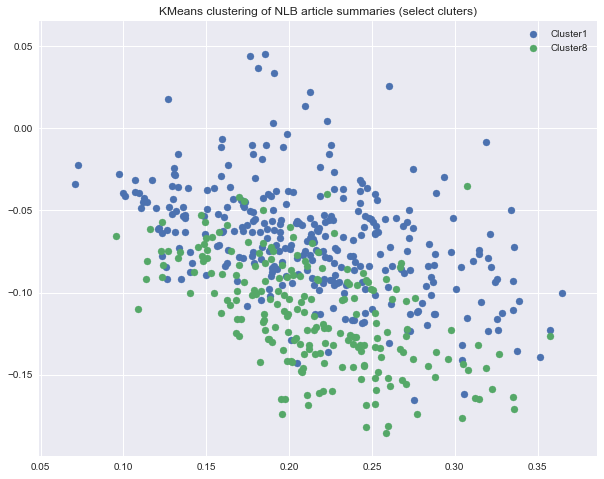

In [17]:
# There is no noticeable difference between the two sets.
# Plotting just the 2 clusters (ignoring the rest), they could have been in the same cluster.

fig, ax = plt.subplots(figsize=(10, 8))
for i in [1, 8]:
    ax.scatter(vec_2d[clusters==i, 0], vec_2d[clusters==i, 1], label=f'Cluster{i}')
    
ax.set_title('KMeans clustering of NLB article summaries (select cluters)')
ax.legend()

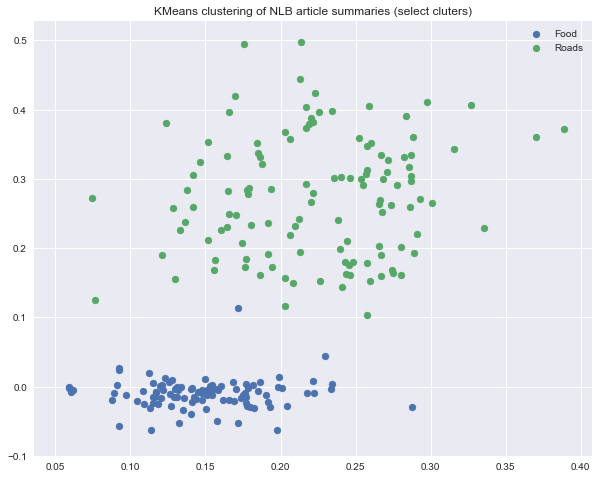

In [18]:
# Let's compare a "Food" cluster (0) with a "Roads" cluster (2)
# There is a noticeable separation, indicating that different words were
# used in describing roads and foods.

fig, ax = plt.subplots(figsize=(10, 8))
for i, name in zip([0, 2], ['Food', 'Roads']):
    ax.scatter(vec_2d[clusters==i, 0], vec_2d[clusters==i, 1], label=name)
    
ax.set_title('KMeans clustering of NLB article summaries (select cluters)')
ax.legend()

Instead of doing clustering, another common approach is to do "topic extraction".

Topic extraction has benefits in that it also suggests "topic words" so that we don't have to inspect the clusters.

Whereas clustering is a general technique that we can use for many things (not just topic extraction).

One way to do topic extraction:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html